In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
path = '/data/data_lyrics_features.csv'
data = pd.read_csv(path, index_col=0)
loudness = data['loudness']

Loudness is in units of dB, which is a logaritmic scale from -60dB to 0dB (in theory, it is possible to go higher, but this almost never happens, because it sounds bad from a sound engineering point of view).

This notebook researches the implications of this logaritmic scale on the normalization of the audio feature.

In [16]:
print(loudness.max())
print(loudness.min())

3.7439999999999998
-60.0


## Histogram of all the loudnesses in the dataset

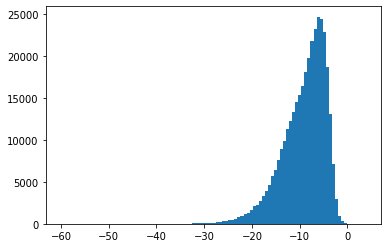

In [19]:
plt.hist(loudness, bins=100)
plt.show()

## Histogram of the normalized loudnesses in the dataset.

We see here that the loudnesses are centered around 0.8/0.9 and most loudnesses are in this range. This means that in most cases we will get nearly the same loudness, which will result in worse recommendation based on this feature.

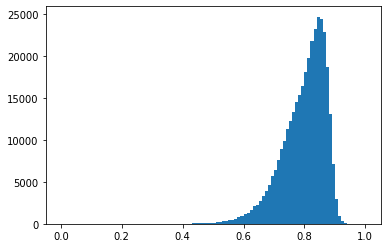

In [24]:
loudness_norm = (loudness - loudness.min())/(loudness.max() - loudness.min())
plt.hist(loudness_norm, bins=100)
plt.show()

## dB to gain-multiplier

Instead of using the gain in dB we can use a unit named gain-multiplier. This is a linear unit running from 0 to 1 and is defined as g = 10 ** (dB/20).

If we do this to the loudnesses in the database and plot the histogram we get a much nicer curve that looks more like a normal curve. This conversion will be used to make recommendations

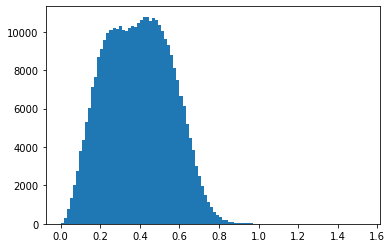

In [51]:
loudness_linear = 10 ** (loudness/20)
plt.hist(loudness_linear, bins=100)
plt.show()

In [52]:
print(loudness_linear.min())
print(loudness_linear.max())

0.001
1.5388631498199548


In [50]:
loudness_linear[loudness_linear > 1].count()

36